In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# TSA from Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
 
# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns

from pmdarima import auto_arima
# pip install pmdarima -i http://pypi.douban.com/simple/ --trusted-host pypi.douban.com

In [28]:
excelFile = '/Users/louis/Downloads/datac.xlsx'
df = pd.read_excel(excelFile, names=['year', 'gdp'],index_col = 'year')
df = df.dropna()
print(df.describe())
print('shape of date', df.shape)
df.head() #用pandas预览数据
df.iloc[0]

              gdp
count   61.000000
mean   401.032787
std    246.405761
min    100.000000
25%    198.000000
50%    317.000000
75%    607.000000
max    875.000000
shape of date (61, 1)


gdp    138
Name: 1960, dtype: int64

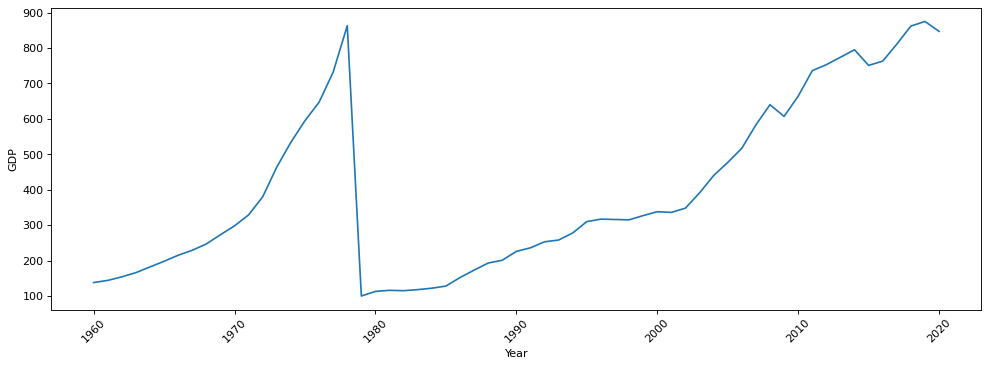

In [3]:
# plot graph
#设置画布大小
plt.figure(figsize=(15,5),dpi = 80)
#横轴坐标旋转45°
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('GDP')
plt.plot(df)
plt.show()

In [4]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF: ", dftest[0])
    print("2. P-Value:", dftest[1])
    print("3. Num of lags:", dftest[2])
    print("4. Num of Observations used for ADF regression and critical values calculation: ", dftest[3])
    print("5. Critical values: ")
    for key, val in dftest[4].items():
        print("\t", key, ": ",val)

In [5]:
ad_test(df)
print("P-Value we want it to be as small as possible")
print("If P-value is not as expect, we need to do diff(1)")

1. ADF:  -1.3573045594527346
2. P-Value: 0.602565204021967
3. Num of lags: 0
4. Num of Observations used for ADF regression and critical values calculation:  60
5. Critical values: 
	 1% :  -3.5443688564814813
	 5% :  -2.9110731481481484
	 10% :  -2.5931902777777776
P-Value we want it to be as small as possible
If P-value is not as expect, we need to do diff(1)


1. ADF:  -8.274195680457604
2. P-Value: 4.704498661491516e-13
3. Num of lags: 0
4. Num of Observations used for ADF regression and critical values calculation:  59
5. Critical values: 
	 1% :  -3.5463945337644063
	 5% :  -2.911939409384601
	 10% :  -2.5936515282964665


array([<AxesSubplot:xlabel='year'>], dtype=object)

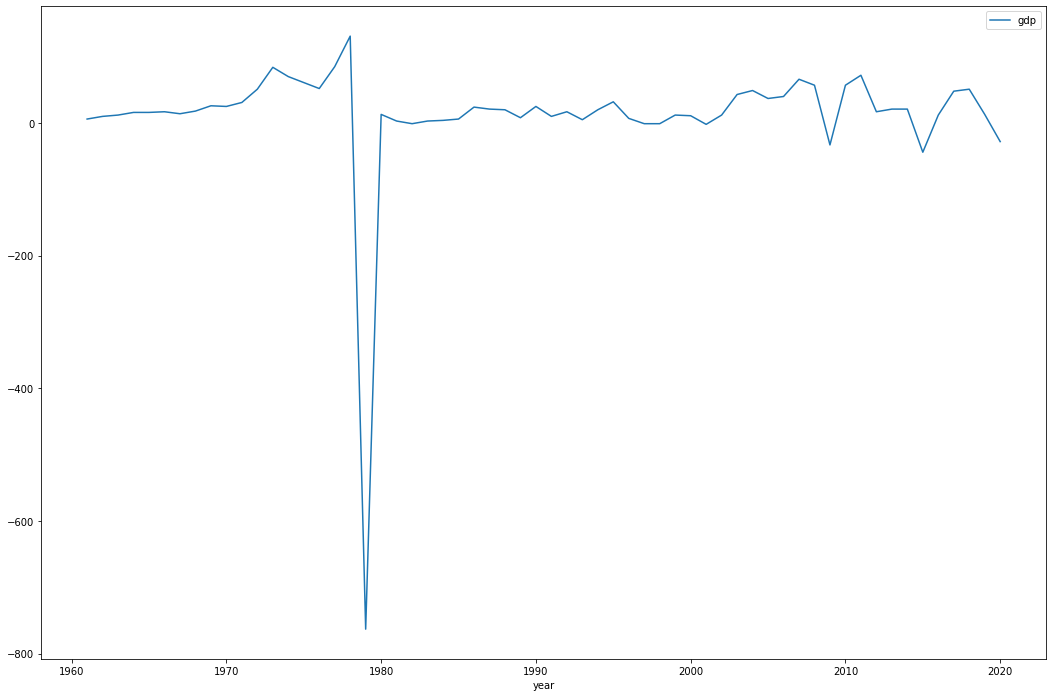

In [6]:
diff1 = df.diff(1).dropna()
# do test again
ad_test(diff1)
diff1.plot(subplots=True, figsize=(18, 12))

1. ADF:  -7.44899972290171
2. P-Value: 5.736599770305459e-11
3. Num of lags: 2
4. Num of Observations used for ADF regression and critical values calculation:  56
5. Critical values: 
	 1% :  -3.552928203580539
	 5% :  -2.9147306250000002
	 10% :  -2.595137155612245


array([<AxesSubplot:xlabel='year'>], dtype=object)

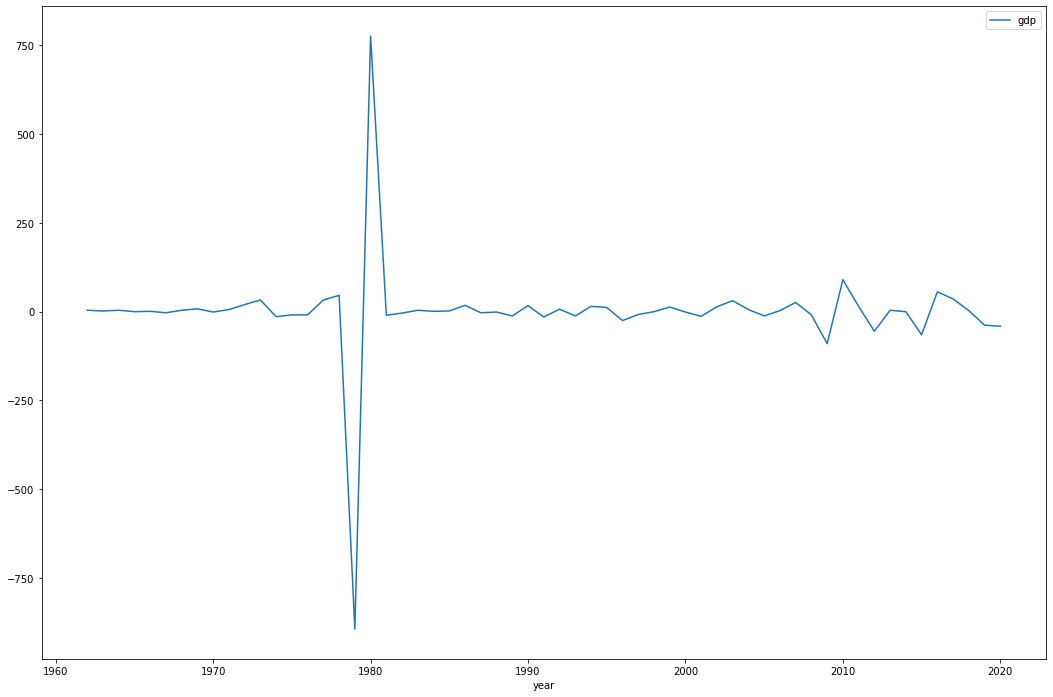

In [7]:
diff2 = diff1.diff(1).dropna()
# do test again
ad_test(diff2)
diff2.plot(subplots=True, figsize=(18, 12))

/Users/louis/Library/Python/3.8/lib/python/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


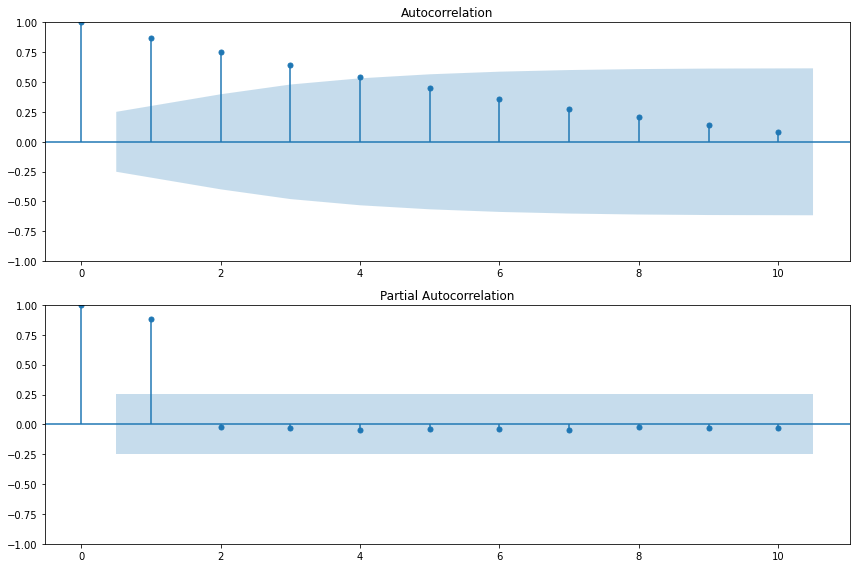

In [8]:
fig = plt.figure(figsize=(12,8))
#acf
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df, lags=10,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout();
#pacf
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=10, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout();
#下图中的阴影表示置信区间，可以看出不同阶数自相关性的变化情况，从而选出p值和q值

In [9]:
# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
# FIND THE BEST MODEL
stepwise_fit = auto_arima(df, trace=True, suppress_warning = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=732.714, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=734.207, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=734.145, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=731.469, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.308 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   61
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -364.735
Date:                Sun, 27 Mar 2022   AIC                            731.469
Time:                        13:04:36   BIC                            733.564
Sample:                             0   HQIC                           732.289
                                 - 61                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.116e+04    432.221     25.818      0.000    1.03e+04     1.2e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):              5853.09
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               0.05   Skew:                            -6.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        49.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
from itertools import product
# ARIMA的参数
ps = range(0, 3)
d = range(0, 3)
qs = range(0, 3)
# 季节项相关的参数
Ps = range(0, 1)
D = range(1, 2)
Qs = range(1, 2)
# 将参数打包，传入下面的数据，是哦那个BIC准则进行参数选择
params_list = list(product(ps, d, qs, Ps, D, Qs))
print(params_list)

[(0, 0, 0, 0, 1, 1), (0, 0, 1, 0, 1, 1), (0, 0, 2, 0, 1, 1), (0, 1, 0, 0, 1, 1), (0, 1, 1, 0, 1, 1), (0, 1, 2, 0, 1, 1), (0, 2, 0, 0, 1, 1), (0, 2, 1, 0, 1, 1), (0, 2, 2, 0, 1, 1), (1, 0, 0, 0, 1, 1), (1, 0, 1, 0, 1, 1), (1, 0, 2, 0, 1, 1), (1, 1, 0, 0, 1, 1), (1, 1, 1, 0, 1, 1), (1, 1, 2, 0, 1, 1), (1, 2, 0, 0, 1, 1), (1, 2, 1, 0, 1, 1), (1, 2, 2, 0, 1, 1), (2, 0, 0, 0, 1, 1), (2, 0, 1, 0, 1, 1), (2, 0, 2, 0, 1, 1), (2, 1, 0, 0, 1, 1), (2, 1, 1, 0, 1, 1), (2, 1, 2, 0, 1, 1), (2, 2, 0, 0, 1, 1), (2, 2, 1, 0, 1, 1), (2, 2, 2, 0, 1, 1)]


In [13]:
from tqdm import tqdm_notebook
def find_best_params(data:np.array, params_list):
    result = []
    best_bic = 100000
    for param in tqdm_notebook(params_list):
        # 模型拟合
        model = SARIMAX(data, order=(param[0], param[1], param[2]), seasonal_order=(param[3], param[4], param[5], 10)).fit(disp=-1)
        bicc = model.bic # 拟合出模型的BIC值
        # 寻找最优的参数
        if bicc < best_bic:
            best_mode = model
            best_bic = bicc
            best_param = param
        param_1 = (param[0], param[1], param[2])
        param_2 = (param[3], param[4], param[5], 10)
        param = 'SARIMA{0}x{1}'.format(param_1, param_2)
        print(param)
        result.append([param, model.bic])

    result_table = pd.DataFrame(result)
    result_table.columns = ['parameters', 'bic']
    result_table = result_table.sort_values(by='bic',ascending=True).reset_index(drop=True)
    return result_table

result_table = find_best_params(df, params_list)
print(result_table)

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 76 kB 136 kB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


  0%|          | 0/27 [00:00<?, ?it/s]

SARIMA(0, 0, 0)x(0, 1, 1, 10)
SARIMA(0, 0, 1)x(0, 1, 1, 10)
SARIMA(0, 0, 2)x(0, 1, 1, 10)
SARIMA(0, 1, 0)x(0, 1, 1, 10)
SARIMA(0, 1, 1)x(0, 1, 1, 10)
SARIMA(0, 1, 2)x(0, 1, 1, 10)
SARIMA(0, 2, 0)x(0, 1, 1, 10)
SARIMA(0, 2, 1)x(0, 1, 1, 10)
SARIMA(0, 2, 2)x(0, 1, 1, 10)
SARIMA(1, 0, 0)x(0, 1, 1, 10)
SARIMA(1, 0, 1)x(0, 1, 1, 10)
SARIMA(1, 0, 2)x(0, 1, 1, 10)
SARIMA(1, 1, 0)x(0, 1, 1, 10)
SARIMA(1, 1, 1)x(0, 1, 1, 10)
SARIMA(1, 1, 2)x(0, 1, 1, 10)
SARIMA(1, 2, 0)x(0, 1, 1, 10)
SARIMA(1, 2, 1)x(0, 1, 1, 10)
SARIMA(1, 2, 2)x(0, 1, 1, 10)
SARIMA(2, 0, 0)x(0, 1, 1, 10)
SARIMA(2, 0, 1)x(0, 1, 1, 10)
SARIMA(2, 0, 2)x(0, 1, 1, 10)
SARIMA(2, 1, 0)x(0, 1, 1, 10)
SARIMA(2, 1, 1)x(0, 1, 1, 10)
SARIMA(2, 1, 2)x(0, 1, 1, 10)
SARIMA(2, 2, 0)x(0, 1, 1, 10)
SARIMA(2, 2, 1)x(0, 1, 1, 10)
SARIMA(2, 2, 2)x(0, 1, 1, 10)
                       parameters         bic
0   SARIMA(0, 2, 1)x(0, 1, 1, 10)  628.934647
1   SARIMA(0, 1, 0)x(0, 1, 1, 10)  631.487330
2   SARIMA(0, 2, 2)x(0, 1, 1, 10)  632.585768
3   SA

In [14]:
#model = ARIMA(df['add'], order=(0,2,1)).fit()
model = SARIMAX(df['gdp'], order=(0,2,1), seasonal_order=(0, 1, 1, 12)).fit()
model.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.09797D+00    |proj g|=  3.00826D-01

At iterate    5    f=  5.00063D+00    |proj g|=  4.78427D-03

At iterate   10    f=  4.95629D+00    |proj g|=  1.53721D-01

At iterate   15    f=  4.87799D+00    |proj g|=  1.17037D-02

At iterate   20    f=  4.87408D+00    |proj g|=  6.51881D-04

At iterate   25    f=  4.87369D+00    |proj g|=  1.45874D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     35      1     0     0   

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                gdp   No. Observations:                   61
Model:             SARIMAX(0, 2, 1)x(0, 1, 1, 12)   Log Likelihood                -297.294
Date:                            Sun, 27 Mar 2022   AIC                            600.587
Time:                                    13:06:32   BIC                            606.138
Sample:                                         0   HQIC                           602.676
                                             - 61                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9988     17.394     -0.057      0.954     -35.091      33.094
ma.S.L12      -0.9927     11.905     -0.083      0.934     -24.326      22.341
sigma2      1.113e+04   2.18e+05      0.051      0.959   -4.15e+05    4.38e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):               603.89
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                            -2.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

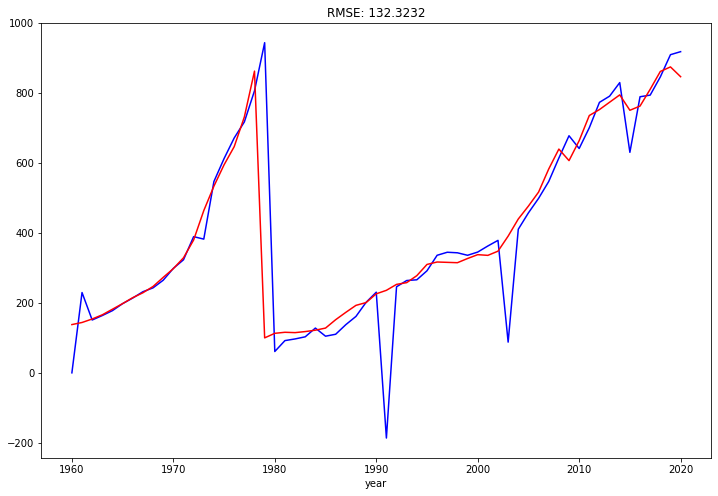

RMSE: 132.3232
Plotting SARIMA model


In [15]:
predict = model.predict(typ='levels')
#df['add'] = df['add'][predict.index]  # 过滤没有预测的记录
predict.plot(color='blue', label='Predict',figsize=(12,8))
df['gdp'].plot(color='red', label='Original',figsize=(12,8))
 
plt.title('RMSE: %.4f'% np.sqrt(sum((predict-df['gdp'])**2)/df['gdp'].size))
plt.show()
print('RMSE: %.4f'% np.sqrt(sum((predict-df['gdp'])**2)/df['gdp'].size))
print('Plotting SARIMA model')

In [26]:
pred = model.predict(start='1960', end='2030',typ='levels')
for i in range (0,len(pred)):
    if pred[i] < 0:
        pred[i] = 0
plt.figure(figsize=(6, 6))
plt.xticks(rotation=45)
plt.plot(pred)
plt.plot(df)

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [19]:
print(predict)

year
1960      0.000000
1961    229.666422
1962    151.111772
1963    163.938921
1964    177.956405
           ...    
2016    789.692739
2017    794.340448
2018    846.407527
2019    910.005917
2020    918.591559
Name: predicted_mean, Length: 61, dtype: float64
